In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Display settings for better visuals
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

print("Done")


Done


In [2]:
import pandas as pd

# Load data
df_cctv = pd.read_csv('../data/cctv_locations.csv')
df_police = pd.read_csv('../data/police_stations.csv')
df_transport = pd.read_csv('../data/public_transport.csv')
df_crime_official = pd.read_csv('../data/official_crime_data.csv')
df_crime_unofficial = pd.read_csv('../data/unofficial_crime_data.csv')

# Preview
df_cctv.head()
df_police.head()
df_transport.head()
#df_crime_official.head()
#df_crime_unofficial.head()





,Name,Latitude,Longitude,Type
0,Thiruvanmiyur Moffusil bus stop,12.987301,80.259419,Bus Stop
1,Sathya Studio,13.014809,80.259350,Bus Stop
2,Guindy,13.008075,80.209390,Bus Stop
3,NaN,13.050564,80.279698,Bus Stop
4,IIT Gate Bus Stop,13.005846,80.242464,Bus Stop


In [3]:
# Rename coordinate columns for consistency
for df in [df_cctv, df_police, df_transport, df_crime_official, df_crime_unofficial]:
    df.rename(columns={'lat': 'Latitude', 'lon': 'Longitude'}, inplace=True)

print("Done")


Done


In [4]:
# Rename lat/lon to Latitude/Longitude for standardization
df_cctv.rename(columns={'lat': 'Latitude', 'lon': 'Longitude'}, inplace=True)
df_police.rename(columns={'lat': 'Latitude', 'lon': 'Longitude'}, inplace=True)

# Drop rows with missing coordinates and convert to float
for df in [df_cctv, df_police]:
    df.dropna(subset=['Latitude', 'Longitude'], inplace=True)
    df['Latitude'] = df['Latitude'].astype(float)
    df['Longitude'] = df['Longitude'].astype(float)

print("Done")


Done


In [5]:
print("CCTV Sample:")
display(df_cctv.head())

print("Police Stations Sample:")
display(df_police.head())

print("Transport Sample:")
display(df_transport.head())

print("Official Crime Data Sample:")
display(df_crime_official.head())

print("Unofficial Crime Data Sample:")
display(df_crime_unofficial.head())


CCTV Sample:


,id,Latitude,Longitude,location_type,name
0,247432808,12.986444,79.971763,college,Sri Venkateswara College of Engineering - SVCE
1,248420920,13.038649,80.205216,hospital,Kalaignar Karunanidhi Nagar
2,248560797,13.122775,80.296058,hospital,Kasimedu
3,248643383,13.039146,80.257284,atm,HDFC Bank
4,248643757,13.039407,80.257379,post_office,Alwarpet


Police Stations Sample:


,osmid,name,Latitude,Longitude
0,250363729,Mambalam Police Station,13.034957,80.229460
1,259773441,Royapettah PS,13.052011,80.263735
2,264481213,NaN,13.059617,80.242768
3,300468066,S-8 Adambakkam Police Station,12.989396,80.201968
4,301949978,Teynampet E3 PS,13.048651,80.249488


Transport Sample:


,Name,Latitude,Longitude,Type
0,Thiruvanmiyur Moffusil bus stop,12.987301,80.259419,Bus Stop
1,Sathya Studio,13.014809,80.259350,Bus Stop
2,Guindy,13.008075,80.209390,Bus Stop
3,NaN,13.050564,80.279698,Bus Stop
4,IIT Gate Bus Stop,13.005846,80.242464,Bus Stop


Official Crime Data Sample:


,Area,Latitude,Longitude,Population,Crime_Count,Crimes_per_1000
0,Tambaram,12.9249,80.1000,960000,63,0.07
1,T. Nagar,13.0418,80.2335,300000,44,0.15
2,Anna Nagar,13.0878,80.2102,310000,26,0.08
3,Royapettah,13.0551,80.2616,175000,13,0.07
4,Choolaimedu,13.0634,80.2274,265000,32,0.12


Unofficial Crime Data Sample:


,Area,Latitude,Longitude,Population,Crime_Count,Crimes_per_1000
0,Tambaram,12.9249,80.1000,960000,63,0.015
1,T. Nagar,13.0418,80.2335,300000,44,0.030
2,Anna Nagar,13.0878,80.2102,310000,26,0.018
3,Royapettah,13.0551,80.2616,175000,13,0.014
4,Choolaimedu,13.0634,80.2274,265000,32,0.026


In [6]:
# Ensure coordinates are float and drop missing values
for df in [df_cctv, df_police, df_transport, df_crime_official, df_crime_unofficial]:
    df.dropna(subset=['Latitude', 'Longitude'], inplace=True)
    df['Latitude'] = df['Latitude'].astype(float)
    df['Longitude'] = df['Longitude'].astype(float)

print("Donee")


Donee


In [7]:
# Define Chennai bounding box
min_lat, max_lat = 12.82, 13.20
min_lon, max_lon = 80.00, 80.33
grid_size = 0.01  # roughly ~1.1 km² per grid

# Generate grid cells
import numpy as np
grid_points = []
for lat in np.arange(min_lat, max_lat, grid_size):
    for lon in np.arange(min_lon, max_lon, grid_size):
        grid_points.append({'Latitude': lat, 'Longitude': lon})

grid_df = pd.DataFrame(grid_points)


print("Donee")

Donee


In [8]:
from sklearn.neighbors import KDTree
import numpy as np

def count_nearby_kdtree(df_grid, df_feature, radius_m=500):
    # Convert degrees to radians
    EARTH_RADIUS_M = 6371000  # in meters
    def deg2rad(deg):
        return np.radians(deg)

    # Convert to radians for more accurate KDTree distance query (if needed later)
    grid_coords = np.radians(df_grid[['Latitude', 'Longitude']].values)
    feature_coords = np.radians(df_feature[['Latitude', 'Longitude']].values)

    # Use BallTree if you want haversine-style geodesic accuracy
    # tree = BallTree(feature_coords, metric='haversine')
    tree = KDTree(feature_coords, metric='euclidean')

    # Query radius in radians if using BallTree. For KDTree, convert radius to degrees:
    radius_deg = radius_m / EARTH_RADIUS_M

    # Query the number of neighbors within the given radius
    indices = tree.query_radius(grid_coords, r=radius_deg)

    # Count how many points found per grid cell
    return [len(i) for i in indices]

print("done")

done


In [9]:
# Count nearby features for each grid point
grid_df['cctv_count'] = count_nearby_kdtree(grid_df, df_cctv, radius_m=500)
grid_df['police_count'] = count_nearby_kdtree(grid_df, df_police, radius_m=500)
grid_df['transport_count'] = count_nearby_kdtree(grid_df, df_transport, radius_m=500)
grid_df['crime_official_count'] = count_nearby_kdtree(grid_df, df_crime_official, radius_m=500)
grid_df['crime_unofficial_count'] = count_nearby_kdtree(grid_df, df_crime_unofficial, radius_m=500)

print("done")

done


In [10]:
from sklearn.preprocessing import MinMaxScaler

# Select relevant columns
features = ['cctv_count', 'police_count', 'transport_count', 'crime_official_count', 'crime_unofficial_count']

# Normalize all features to 0–1
scaler = MinMaxScaler()
grid_df_scaled = pd.DataFrame(scaler.fit_transform(grid_df[features]), columns=features)

# Invert crime scores since higher crime = less safety
grid_df_scaled['crime_official_count'] = 1 - grid_df_scaled['crime_official_count']
grid_df_scaled['crime_unofficial_count'] = 1 - grid_df_scaled['crime_unofficial_count']

# Apply weighted score
grid_df['safety_score'] = (
    grid_df_scaled['cctv_count'] * 0.30 +
    grid_df_scaled['police_count'] * 0.20 +
    grid_df_scaled['transport_count'] * 0.15 +
    grid_df_scaled['crime_official_count'] * 0.30 +
    grid_df_scaled['crime_unofficial_count'] * 0.05
) * 100  # Final score out of 100

# Optional: Create safety levels
grid_df['safety_level'] = pd.cut(grid_df['safety_score'],
                                 bins=[0, 40, 70, 100],
                                 labels=['Low', 'Medium', 'High'])

print("Done")

Done


G:\MLenv\envs\women_safety_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


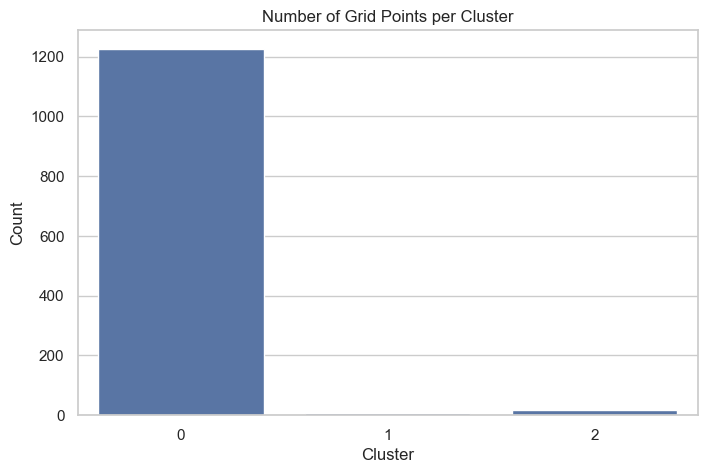


Average Safety Score per Cluster:
 cluster
0    35.259216
1    63.750362
2    56.140351
Name: safety_score, dtype: float64

Clustering and safety scoring completed.


In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Define features again (already scaled and crime-inverted)
features_scaled = ['cctv_count', 'police_count', 'transport_count', 'crime_official_count', 'crime_unofficial_count']

# Run KMeans with 3 clusters (you can change n_clusters if needed)
kmeans = KMeans(n_clusters=3, random_state=42)
grid_df['cluster'] = kmeans.fit_predict(grid_df_scaled[features_scaled])

# Visualize cluster distribution (optional)
plt.figure(figsize=(8, 5))
sns.countplot(x='cluster', data=grid_df)
plt.title('Number of Grid Points per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Optional: See average safety score per cluster
cluster_means = grid_df.groupby('cluster')['safety_score'].mean()
print("\nAverage Safety Score per Cluster:\n", cluster_means)

# Optional: Save to CSV
grid_df.to_csv("clustered_grid_with_safety.csv", index=False)
print("\nClustering and safety scoring completed.")


In [49]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(grid_df_scaled[features_scaled], grid_df['cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.9310592200102424


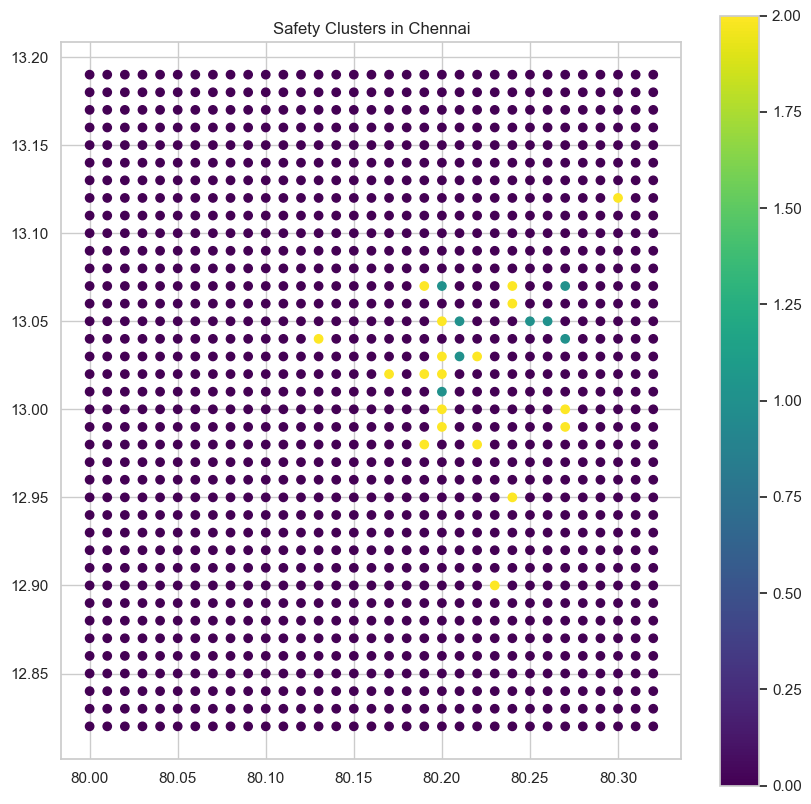

In [50]:
import geopandas as gpd
from shapely.geometry import Point

# Assuming 'grid_df' has columns 'latitude' and 'longitude' for each grid
geometry = [Point(xy) for xy in zip(grid_df['Longitude'], grid_df['Latitude'])]
geo_df = gpd.GeoDataFrame(grid_df, geometry=geometry)

# Plot the clusters on the map
fig, ax = plt.subplots(figsize=(10, 10))
geo_df.plot(column='cluster', cmap='viridis', ax=ax, legend=True)
plt.title("Safety Clusters in Chennai")
plt.show()


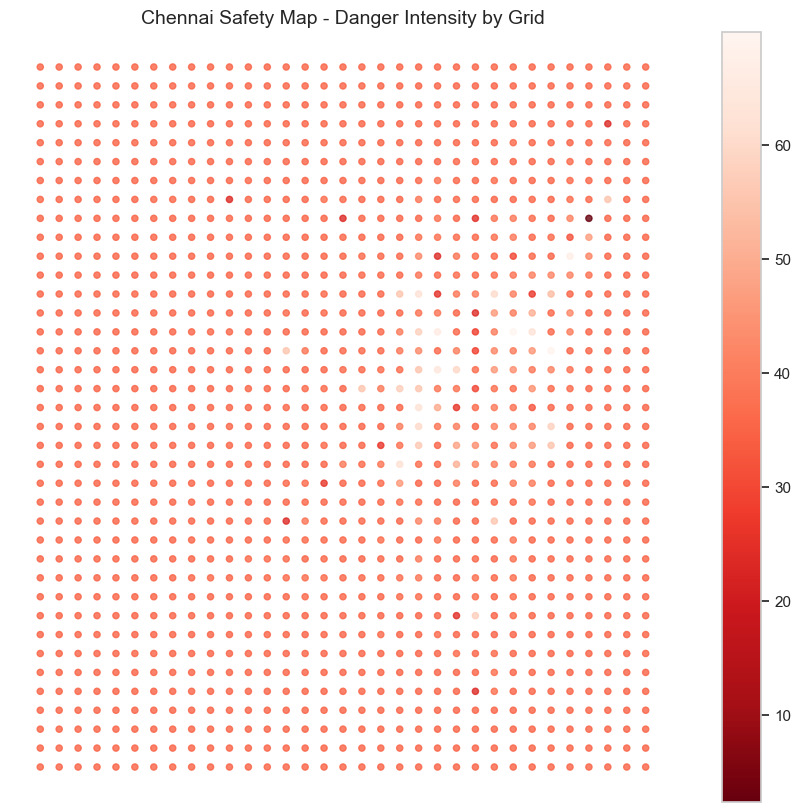

In [51]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Create geometry column if not done already
grid_df['geometry'] = [Point(xy) for xy in zip(grid_df['Longitude'], grid_df['Latitude'])]
geo_df = gpd.GeoDataFrame(grid_df, geometry='geometry')

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the GeoDataFrame using safety_score with red color scale
geo_df.plot(
    column='safety_score',
    cmap='Reds_r',  # 'Reds_r' goes from light red (low) to dark red (high)
    legend=True,
    markersize=20,
    ax=ax,
    alpha=0.8
)

plt.title('Chennai Safety Map - Danger Intensity by Grid', fontsize=14)
plt.axis('off')
plt.show()


In [52]:
Map Making

SyntaxError: invalid syntax (2377084056.py, line 1)

In [53]:
import folium
from folium import plugins
import pandas as pd
from branca.colormap import linear

# Normalize safety scores between 0 and 1
grid_df['safety_score_norm'] = (grid_df['safety_score'] - grid_df['safety_score'].min()) / \
                               (grid_df['safety_score'].max() - grid_df['safety_score'].min())

print("done")

done


In [54]:
# Create base map
m = folium.Map(location=[13.08, 80.27], zoom_start=11, tiles='cartodbpositron')

print("done")

done


In [55]:
# Color scale: light red (safe) to dark red (dangerous)
colormap = linear.Reds_09.scale(0, 1)
colormap.caption = 'Danger Intensity (Safety Score)'
colormap.add_to(m)

print("done")

done


In [56]:
for _, row in grid_df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=colormap(row['safety_score_norm']),
        fill=True,
        fill_color=colormap(row['safety_score_norm']),
        fill_opacity=0.7,
        popup=f"Score: {row['safety_score']:.2f}"
    ).add_to(m)

print("done")

done


In [57]:
m.save('chennai_safety_map.html')
print("Map saved as 'chennai_safety_map.html'")


Map saved as 'chennai_safety_map.html'


In [ ]:
Actual MAP

In [58]:
from shapely.geometry import box
import folium
from folium import GeoJson
import geopandas as gpd
import json

# Example grid size in degrees (adjust as per your dataset)
grid_size = 0.01  # ~1 km x 1 km

# Create polygons for each grid
grid_df['geometry'] = grid_df.apply(
    lambda row: box(
        row['Longitude'] - grid_size / 2,
        row['Latitude'] - grid_size / 2,
        row['Longitude'] + grid_size / 2,
        row['Latitude'] + grid_size / 2
    ), axis=1)

# Normalize safety scores
grid_df['safety_score_norm'] = (grid_df['safety_score'] - grid_df['safety_score'].min()) / \
                               (grid_df['safety_score'].max() - grid_df['safety_score'].min())

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(grid_df, geometry='geometry')

print("done")

done


In [59]:
# Base map
m = folium.Map(location=[13.08, 80.27], zoom_start=11, tiles='cartodbpositron')

# Color scale
from branca.colormap import linear
colormap = linear.Reds_09.scale(0, 1)
colormap.caption = 'Danger Intensity (Safety Score)'
colormap.add_to(m)

print("done")

done


In [60]:
# Convert to GeoJSON
gdf_json = gdf[['geometry', 'safety_score_norm']].to_json()

# Define a style function
def style_function(feature):
    score = feature['properties']['safety_score_norm']
    return {
        'fillColor': colormap(score),
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.7,
        'opacity': 0.3
    }

# Add grids to map with a conditional border (shown only at high zoom levels)
geojson_layer = folium.GeoJson(
    data=gdf_json,
    style_function=style_function,
    name='Safety Grid',
    tooltip=folium.GeoJsonTooltip(fields=[]),
    zoom_on_click=True
)
geojson_layer.add_to(m)

print("done")

done


In [61]:
folium.LayerControl().add_to(m)
m.save('chennai_safety_grid_map.html')

print("done")

done


In [ ]:
Grid making

In [62]:
print(grid_df.columns)


Index(['Latitude', 'Longitude', 'cctv_count', 'police_count',
       'transport_count', 'crime_official_count', 'crime_unofficial_count',
       'safety_score', 'safety_level', 'cluster', 'geometry',
       'safety_score_norm'],
      dtype='object')


In [63]:
# Rename columns for backend compatibility
grid_df_renamed = grid_df.rename(columns={
    'Latitude': 'lat',
    'Longitude': 'lon',
    'safety_score_norm': 'safety_score',  # Use normalized score for API
})

# Optional: Round values for cleaner frontend rendering
grid_df_renamed['lat'] = grid_df_renamed['lat'].round(6)
grid_df_renamed['lon'] = grid_df_renamed['lon'].round(6)
grid_df_renamed['safety_score'] = grid_df_renamed['safety_score'].round(3)

# Drop 'geometry' and any columns not needed in backend
grid_df_cleaned = grid_df_renamed.drop(columns=['geometry', 'safety_level'])

# Save to CSV
grid_df_cleaned.to_csv("clustered_grid_with_safety.csv", index=False)
print("✅ File saved: clustered_grid_with_safety.csv")


✅ File saved: clustered_grid_with_safety.csv


In [64]:
# 1. Print all column names to inspect duplicates
print("Columns:", gdf.columns.tolist())


Columns: ['Latitude', 'Longitude', 'cctv_count', 'police_count', 'transport_count', 'crime_official_count', 'crime_unofficial_count', 'safety_score', 'safety_level', 'cluster', 'geometry', 'safety_score_norm']


In [66]:
# Set CRS explicitly if not already set
gdf = gdf.set_crs(epsg=4326, allow_override=True)

# Now save to GeoJSON
gdf[['geometry', 'safety_score_norm']].to_file("grid_polygons.geojson", driver="GeoJSON")

print("✅ GeoJSON saved with correct CRS.")


✅ GeoJSON saved with correct CRS.


In [67]:
import geopandas as gpd

# Optional: round the normalized safety score for display
gdf['safety_score_norm'] = gdf['safety_score_norm'].round(3)

# Save GeoJSON using the normalized score
output_path = "grid_polygons.geojson"
gdf[['geometry', 'safety_score_norm']].to_file(output_path, driver='GeoJSON')

print(f"✅ GeoJSON file saved at: {output_path}")


✅ GeoJSON file saved at: grid_polygons.geojson


In [68]:
import folium
import geopandas as gpd
import branca.colormap as cm

# Load the GeoJSON as a GeoDataFrame
gdf = gpd.read_file("grid_polygons.geojson")

# Ensure CRS is set
gdf = gdf.set_crs(epsg=4326, allow_override=True)

# Create color scale for safety_score_norm
colormap = cm.LinearColormap(
    colors=["#ffcccc", "#ff6666", "#cc0000"],  # Light to dark red
    vmin=gdf["safety_score_norm"].min(),
    vmax=gdf["safety_score_norm"].max(),
    caption="Normalized Safety Score (0=Safe, 1=Danger)"
)

# Define style function
def style_function(feature):
    score = feature["properties"]["safety_score_norm"]
    return {
        "fillColor": colormap(score),
        "color": "black",
        "weight": 0.5,
        "fillOpacity": 0.7,
        "opacity": 0.1
    }

# Initialize Folium map centered on Chennai
m = folium.Map(location=[13.0827, 80.2707], zoom_start=11, tiles="cartodbpositron")

# Add GeoJSON layer
folium.GeoJson(
    gdf,
    name="Safety Grid",
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=["safety_score_norm"]),
    zoom_on_click=True
).add_to(m)

# Add color legend
colormap.add_to(m)

# Save map to HTML
m.save("chennai_city_safety_map.html")
print("✅ Map saved as chennai_safety_map.html")


✅ Map saved as chennai_safety_map.html
